In [547]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [548]:
os.getcwd()

'C:\\Users\\bahad\\GitHub\\Research\\Models'

In [549]:
pd.set_option("display.max_columns", None)

# Data Loading

In [550]:
data_initial=pd.read_csv("D:/Datasets/m5-forecasting-accuracy/Obtained_Data/second_scenario.csv",dtype={"event_name_1": object,
                                                                                         "event_type_1": object,
                                                                                         "event_name_2": object,
                                                                                         "event_type_2": object,},index_col=0)

In [551]:
data_initial["date"]=pd.to_datetime(data_initial["date"])

In [552]:
data_initial.event_name_1.value_counts()

ValentinesDay          18
Purim End              18
SuperBowl              18
LentStart              18
PresidentsDay          18
StPatricksDay          18
LentWeek2              18
LaborDay               15
Ramadan starts         15
Eid al-Fitr            15
Pesach End             15
VeteransDay            15
Halloween              15
IndependenceDay        15
Mother's day           15
NewYear                15
Thanksgiving           15
Chanukah End           15
NBAFinalsEnd           15
Easter                 15
OrthodoxChristmas      15
Christmas              15
EidAlAdha              15
MartinLutherKingDay    15
NBAFinalsStart         15
ColumbusDay            15
MemorialDay            15
Cinco De Mayo          12
OrthodoxEaster         12
Father's day           12
Name: event_name_1, dtype: int64

In [553]:
data_initial.shape

(5739, 40)

In [554]:
data_initial.head()

,store_id,Total_sales,Sales,date,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,TX_1,1119,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,TX_2,1112,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
2,TX_3,785,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,nan,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
3,TX_1,1119,1,2011-01-30,NaN,NaN,NaN,NaN,0,0,0,2.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
4,TX_2,1112,0,2011-01-30,NaN,NaN,NaN,NaN,0,0,0,2.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


## Event Conversion

In [555]:
from sklearn.preprocessing import OneHotEncoder

In [556]:
hot_encoder=OneHotEncoder()

## Event

In [557]:
data_initial.drop(["event_name_1", "event_name_2", "event_type_2", "CA", "TX", "WI"], axis=1, inplace=True)

In [558]:
data_initial[data_initial["event_type_1"].isna()]["event_type_1"]=0
data_initial["event_type_1"]=data_initial["event_type_1"].astype(str)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [559]:
encoded_event=hot_encoder.fit_transform(data_initial[["event_type_1"]])
array_event=encoded_event.toarray()

In [560]:
hot_encoder.categories_

[array(['Cultural', 'National', 'Religious', 'Sporting', 'nan'],
       dtype=object)]

In [561]:
event_df=pd.DataFrame(array_event,columns=["Cultural", "National", "Religious", "Sporting", 'nan'])

## Store Id

In [562]:
encoded_store=hot_encoder.fit_transform(data_initial[["store_id"]])
array_store=encoded_store.toarray()

In [563]:
hot_encoder.categories_

[array(['TX_1', 'TX_2', 'TX_3'], dtype=object)]

In [564]:
store_df=pd.DataFrame(array_store, columns=['TX_1', 'TX_2', 'TX_3'])

In [565]:
frames=[data_initial, event_df, store_df]
data=pd.concat(frames, axis=1)

In [566]:
data.drop(["event_type_1", "nan", "Total_sales", "store_id"], axis=1, inplace=True)

In [567]:
data.head()

,Sales,date,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3
0,0,2011-01-29,0,0,0,2.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000
1,0,2011-01-29,0,0,0,2.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000
2,0,2011-01-29,0,0,0,nan,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000
3,1,2011-01-30,0,0,0,2.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000
4,0,2011-01-30,0,0,0,2.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000


In [568]:
data.describe()

,Sales,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3
count,"5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,732.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000","5,739.00000000"
mean,0.52552710,0.32932567,0.32932567,0.32932567,2.16268493,0.14270779,0.14270779,0.14323053,0.14323053,0.14270779,0.14270779,0.14270779,0.08259279,0.08886566,0.09722948,0.09095661,0.08102457,0.07841087,0.08102457,0.08102457,0.07841087,0.08102457,0.07841087,0.08102457,0.17616309,0.19132253,0.19079979,0.19079979,0.19079979,0.06011500,0.01829587,0.02665970,0.02718244,0.00836383,0.33333333,0.33333333,0.33333333
std,1.10364034,0.47000932,0.47000932,0.47000932,0.12914601,0.34980508,0.34980508,0.35033831,0.35033831,0.34980508,0.34980508,0.34980508,0.27528971,0.28457453,0.29629581,0.28757246,0.27289662,0.26884048,0.27289662,0.27289662,0.26884048,0.27289662,0.26884048,0.27289662,0.38099206,0.39337664,0.39296582,0.39296582,0.39296582,0.23772050,0.13403082,0.16110084,0.16262890,0.09107864,0.47144560,0.47144560,0.47144560
min,0.00000000,0.00000000,0.00000000,0.00000000,0.99000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
25%,0.00000000,0.00000000,0.00000000,0.00000000,2.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
50%,0.00000000,0.00000000,0.00000000,0.00000000,2.24000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
75%,1.00000000,1.00000000,1.00000000,1.00000000,2.24000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,1.00000000,1.00000000
max,24.00000000,1.00000000,1.00000000,1.00000000,2.24000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000


In [569]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5739 entries, 0 to 5738
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Sales       5739 non-null   int64         
 1   date        5739 non-null   datetime64[ns]
 2   snap_CA     5739 non-null   int64         
 3   snap_TX     5739 non-null   int64         
 4   snap_WI     5739 non-null   int64         
 5   sell_price  5732 non-null   float64       
 6   Friday      5739 non-null   float64       
 7   Monday      5739 non-null   float64       
 8   Saturday    5739 non-null   float64       
 9   Sunday      5739 non-null   float64       
 10  Thursday    5739 non-null   float64       
 11  Tuesday     5739 non-null   float64       
 12  Wednesday   5739 non-null   float64       
 13  Jan         5739 non-null   float64       
 14  Feb         5739 non-null   float64       
 15  Mar         5739 non-null   float64       
 16  Apr         5739 non-nul

# Performance Function

In [570]:
def performance_list(ID, forecast, actual):
    name=ID
    n=len(actual)
    error=actual-forecast
    mean=np.mean(actual)
    sd=actual.std()
    FBias=sum(error)/sum(actual)
    MPE=sum(error/actual)/n
    MAPE=sum(abs(error/actual))/n
    RMSE=np.sqrt(sum(error**2))/n
    MAD=sum(abs(error))/n
    WMAPE=MAD/mean
    result_df=pd.DataFrame({"Name" :       name ,
                            "# of inst":       n,
                            "Mean":         mean,
                            "Standard Dev.":  sd, 
                            "FBias":       FBias, 
                            "MPE":           MPE, 
                            "MAPE":         MAPE,                                      
                            "RMSE":         RMSE, 
                            "MAD":           MAD, 
                            "WMAPE":      WMAPE}, index=[0])
    return(result_df)

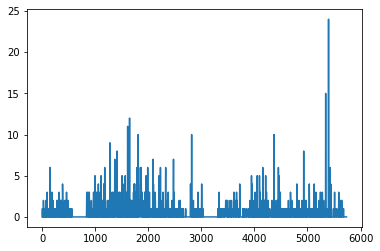

In [571]:
plt.plot(data[data["TX_1"]==1].Sales)

In [572]:
# data['trend']=(data["date"]-data["date"].min()).dt.days

In [573]:
data.fillna(method="ffill", inplace=True)

### Train & Test

In [574]:
# train=data[data["date"]<((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]

In [575]:
# test=data[data["date"]>=((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]
# test.reset_index(drop=True, inplace=True)

### Train & Test Actual

In [576]:
import datetime as datetime

In [577]:
test_lenght=28
specific_date=data["date"].max()-datetime.timedelta(28)

In [578]:
train=data[data["date"]<=specific_date]

In [579]:
test=data[data["date"]>specific_date]
test.reset_index(drop=True, inplace=True)

### Date and Customer Drop

In [580]:
train=train.drop(["date"], axis=1)
test=test.drop(["date"], axis=1)

In [581]:
X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]

# Linear Regression-Elastic Net

In [582]:
from sklearn.model_selection import GridSearchCV

In [583]:
from sklearn.linear_model import ElasticNet

### Grid

In [584]:
elastic_net_model = ElasticNet()

In [585]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [586]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [587]:
elastic_net.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [588]:
elastic_predictions=elastic_net.predict(X_test)

In [589]:
performance_list("Control", elastic_net.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,5655,0.52873563,1.10878733,-0.00000000,-inf,inf,0.01465880,0.71147838,1.34562214


In [590]:
res_elastic=performance_list("Elastic Net Performance", elastic_predictions, y_test)

In [591]:
res_elastic

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,84,0.30952381,0.63958176,-0.40497838,-inf,inf,0.07148455,0.54569391,1.76301110


# Support Vector Machines

### Grid

In [592]:
elastic_net_model = ElasticNet()

In [593]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [594]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

### Linear

In [595]:
from sklearn.svm import LinearSVR

In [596]:
sv_regressor=LinearSVR()

### Grid

In [597]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [598]:
sv_regressor = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True)

In [599]:
sv_regressor.fit(X_train, y_train)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear f

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

### Poly with Kernel

In [600]:
from sklearn.svm import SVR

### Grid

In [601]:
param_grid_svm_poly=[
    {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [602]:
sv_regressor_poly=SVR(kernel="poly")

In [603]:
sv_regressor_poly = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [604]:
sv_regressor_poly.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [605]:
sv_regressor_poly.best_estimator_

SVR(degree=2, epsilon=0.2, kernel='poly')

### Predictions

In [606]:
svm_predictions_linear=sv_regressor.predict(X_test)

In [607]:
res_svr_linear=performance_list("Support Vector Regressor Linear Performance", svm_predictions_linear, y_test)

In [608]:
svm_predictions_poly=sv_regressor_poly.predict(X_test)

In [609]:
res_svr_poly=performance_list("Support Vector Regressor Polynomial Performance", svm_predictions_poly, y_test)

In [610]:
performance_list("Control", sv_regressor.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,5655,0.52873563,1.10878733,1.26951461,nan,inf,0.01846270,0.90170074,1.70539053


In [611]:
performance_list("Control", sv_regressor_poly.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,5655,0.52873563,1.10878733,0.62125761,-inf,inf,0.01537659,0.60135005,1.13733596


### Results

In [612]:
res_svr_linear

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Linear Performance,84,0.30952381,0.63958176,3.91379054,inf,inf,0.15008115,1.21141136,3.91379054


In [613]:
res_svr_poly

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Polynomial Performance,84,0.30952381,0.63958176,0.35481302,-inf,inf,0.07039513,0.41413254,1.33796667


# Random Forest

In [614]:
from sklearn.ensemble import RandomForestRegressor

### Grid

In [615]:
param_grid=[
    {"n_estimators":[200,300,500], "max_features":[8,12,16],
     "bootstrap":[False,True]}
]

In [616]:
random_reg=RandomForestRegressor()
grid_search = GridSearchCV(estimator=random_reg, param_grid=param_grid,
                 cv=10,return_train_score=True)

### Predictions

In [617]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True],
                          'max_features': [8, 12, 16],
                          'n_estimators': [200, 300, 500]}],
             return_train_score=True)

In [618]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 8, 'n_estimators': 500}

### Results

In [619]:
rf_predictions=grid_search.predict(X_test)

In [620]:
res_rf=performance_list("Random Forest Performance", rf_predictions, y_test)

In [621]:
res_rf

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance,84,0.30952381,0.63958176,-1.26569231,-inf,inf,0.09381269,0.69090476,2.23215385


In [622]:
performance_list("Control", grid_search.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,5655,0.52873563,1.10878733,-0.01095184,nan,nan,0.00553332,0.25251530,0.47758328


# Feature Extraction

In [711]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

### Train Node Selection

In [712]:
grid_search = DecisionTreeRegressor()

In [736]:
param_grid_feature = [
{'min_samples_leaf': [5, 7, 10, 15, 20], 'max_depth': [4, 5, 7, 10, 12, 15], 'min_samples_split': [30, 40, 50, 60, 80]}
]

In [737]:
estimator_best = GridSearchCV(grid_search, param_grid_feature, cv=5)

In [738]:
estimator_best.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [4, 5, 7, 10, 12, 15],
                          'min_samples_leaf': [5, 7, 10, 15, 20],
                          'min_samples_split': [30, 40, 50, 60, 80]}])

## Best Parameters

In [739]:
estimator_best.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=30)

### Final Decision Tree

In [740]:
estimator = DecisionTreeRegressor(max_depth= estimator_best.best_estimator_.max_depth, 
                                  min_impurity_decrease= estimator_best.best_estimator_.min_impurity_decrease,
                                  min_samples_leaf= estimator_best.best_estimator_.min_samples_leaf)

In [741]:
estimator.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=20)

In [742]:
on_leaf = estimator.apply(X_train)
X_train_ext=X_train[:]
X_train_ext["Node"] = on_leaf.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


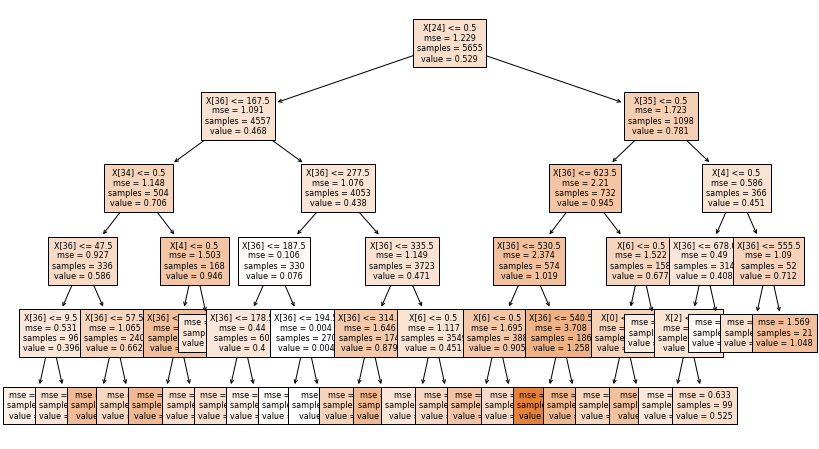

In [743]:
plt.figure(figsize=(14, 8)) 
plt.show(tree.plot_tree(estimator,filled=True, fontsize=8))

In [744]:
X_train_ext

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,trend,Node
0,0,0,0,2.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0,5
1,0,0,0,2.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0,12
2,0,0,0,2.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0,5
3,0,0,0,2.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1,5
4,0,0,0,2.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5650,0,0,0,2.24000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1883,29
5651,0,0,0,2.24000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,1883,29
5652,0,0,0,2.24000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1884,28
5653,0,0,0,2.24000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1884,28


### Test Node Selection

In [745]:
on_leaf_test = estimator.apply(X_test)

In [746]:
X_test_ext=X_test[:]

In [747]:
X_test_ext["Node"] = on_leaf_test.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [748]:
X_test_ext

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,trend,Node
0,0,0,0,2.24000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1885,28
1,0,0,0,2.24000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1885,28
2,0,0,0,2.24000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,1885,28
3,0,0,0,2.24000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1886,28
4,0,0,0,2.24000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1886,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0,0,2.24000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1911,29
80,0,0,0,2.24000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,1911,29
81,0,0,0,2.24000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1912,28
82,0,0,0,2.24000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1912,28


### Feature Adding

Ma=1 kullanıldı daha hızlı bir şekilde anlaşılması için

In [749]:
Xframes_feature=[X_train_ext, X_test_ext]
yframes_feature=[y_train, y_test]
X_concat=pd.concat(Xframes_feature)
Y_concat=pd.concat(yframes_feature)
final_frame=[X_concat, Y_concat]
concated_df=pd.concat(final_frame, axis=1)

In [750]:
concated_df["new_feature"] = concated_df.groupby(["Node"])["Sales"].shift(+1)

# Feature Control

In [751]:
concated_df["Node"].value_counts()

28    3111
29     522
34     334
22     249
9      220
47     194
38     166
12     120
25     111
41     104
48      99
6       76
26      63
35      54
18      33
42      32
51      31
19      27
13      24
14      24
43      22
52      21
49      21
21      21
5       20
37      20
8       20
Name: Node, dtype: int64

In [752]:
concated_df[-28:].Node

56    28
57    29
58    29
59    29
60    28
61    28
62    28
63    28
64    28
65    28
66    28
67    28
68    28
69    28
70    28
71    28
72    28
73    28
74    28
75    28
76    28
77    28
78    29
79    29
80    29
81    28
82    28
83    28
Name: Node, dtype: int64

## New Feature Adding to Test Set

In [753]:
for i in list(range(0,28)):
    current_node=concated_df.iloc[-(28-i)].Node
    train_dt=concated_df.iloc[:-28]
    new_value=train_dt[train_dt["Node"]==int(current_node)].iloc[-1].Sales
    concated_df.iloc[-(28-i),concated_df.shape[1]-1]=new_value

In [754]:
concated_df[concated_df["Node"]==int(44)]

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,trend,Node,Sales,new_feature


In [755]:
X_test_new=concated_df.iloc[len(X_train):].drop(["Sales","Node"], axis=1)

y_test_new=concated_df.iloc[len(X_train):]["Sales"]

In [756]:
train_new=concated_df.iloc[:len(X_train)]

In [757]:
train_new.dropna(inplace=True);
train_new.reset_index(drop=True, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [758]:
X_train_new=train_new.drop(["Sales","Node"], axis=1)

y_train_new=train_new["Sales"]

# Linear Regression-Elastic Net

### Grid

In [759]:
elastic_net_model_new = ElasticNet()

In [760]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [761]:
elastic_net_new = GridSearchCV(estimator=elastic_net_model_new, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [762]:
elastic_net_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [763]:
elastic_predictions_new=elastic_net_new.predict(X_test_new)

In [764]:
res_elastic_new=performance_list("Elastic Net Performance with Feature Extraction", elastic_predictions_new, y_test_new)

In [765]:
res_elastic_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance with Feature Extraction,84,0.30952381,0.63958176,-0.49198462,-inf,inf,0.07314956,0.56558104,1.82726181


### SVM

#### Linear

In [655]:
sv_regressor_new=LinearSVR(max_iter=2000)

### Grid

In [656]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [657]:
sv_regressor_new = GridSearchCV(estimator=sv_regressor_new, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True)

In [658]:
sv_regressor_new.fit(X_train_new, y_train_new)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear f

GridSearchCV(cv=10, estimator=LinearSVR(max_iter=2000),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

In [659]:
svm_predictions_new=sv_regressor_new.predict(X_test_new)

res_svr_new=performance_list("SVR Linear Performance with Feature Extraction", 
                                svm_predictions_new, y_test_new)

res_svr_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Linear Performance with Feature Extraction,84,0.30952381,0.63958176,-2.06299779,-inf,inf,0.09870242,0.80668808,2.60622302


## Poly

### Grid

In [660]:
param_grid_svm_poly=[
    {"degree":[2,3,4], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [661]:
sv_regressor_poly_new=SVR(kernel="poly")

In [662]:
sv_regressor_poly_new = GridSearchCV(estimator=sv_regressor_poly_new, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [663]:
sv_regressor_poly_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3, 4],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [664]:
sv_regressor_poly_new.best_estimator_

SVR(epsilon=0.2, kernel='poly')

In [665]:
svm_predictions_poly_new=sv_regressor_poly_new.predict(X_test_new)

res_svr_poly_new=performance_list("SVR Polynomail Performance with Feature Extraction", 
                                svm_predictions_poly_new, y_test_new)

res_svr_poly_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Polynomail Performance with Feature Extrac...,84,0.30952381,0.63958176,0.35359568,-inf,inf,0.07038870,0.41433207,1.33861129


### Random Forest

In [666]:
param_grid=[
    {"n_estimators":[200,300,500], "max_features":[8,12,16],
     "bootstrap":[False,True]}
]

In [667]:
random_reg_new=RandomForestRegressor()
grid_search_new = GridSearchCV(estimator=random_reg_new, param_grid=param_grid,
                 cv=10,return_train_score=True)

In [668]:
grid_search_new.fit(X_train_new, y_train_new)

grid_search_new.best_params_

{'bootstrap': True, 'max_features': 8, 'n_estimators': 300}

In [669]:
rf_predictions_new=grid_search_new.predict(X_test_new)

res_rf_new=performance_list("Random Forest Performance with Feature Extraction", rf_predictions_new, y_test_new)

res_rf_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance with Feature Extraction,84,0.30952381,0.63958176,-1.44179487,-inf,inf,0.09883535,0.72246032,2.33410256


# General Result Table

In [766]:
pd.options.display.float_format = '{:,.8f}'.format

In [767]:
result_frames=[res_elastic,res_svr_linear,res_svr_poly,res_rf, res_elastic_new,res_svr_new,res_svr_poly_new,res_rf_new]
total_result=pd.concat(result_frames)
total_result.reset_index(drop=True, inplace=True)

In [672]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,84,0.30952381,0.63958176,-0.40497838,-inf,inf,0.07148455,0.54569391,1.76301110
1,Support Vector Regressor Linear Performance,84,0.30952381,0.63958176,3.91379054,inf,inf,0.15008115,1.21141136,3.91379054
2,Support Vector Regressor Polynomial Performance,84,0.30952381,0.63958176,0.35481302,-inf,inf,0.07039513,0.41413254,1.33796667
3,Random Forest Performance,84,0.30952381,0.63958176,-1.26569231,-inf,inf,0.09381269,0.69090476,2.23215385
4,Elastic Net Performance with Feature Extraction,84,0.30952381,0.63958176,-0.49274830,-inf,inf,0.07286724,0.56407503,1.82239625
5,SVR Linear Performance with Feature Extraction,84,0.30952381,0.63958176,-2.06299779,-inf,inf,0.09870242,0.80668808,2.60622302
6,SVR Polynomail Performance with Feature Extrac...,84,0.30952381,0.63958176,0.35359568,-inf,inf,0.07038870,0.41433207,1.33861129
7,Random Forest Performance with Feature Extraction,84,0.30952381,0.63958176,-1.44179487,-inf,inf,0.09883535,0.72246032,2.33410256


## RFOverfitting

In [673]:
rf_control=grid_search.predict(X_train)

performance_list("RF Performance without Feature Extraction",rf_control, y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance without Feature Extraction,5655,0.52873563,1.10878733,-0.01095184,nan,nan,0.00553332,0.25251530,0.47758328


In [674]:
rf_control=grid_search.predict(X_test)

performance_list("RF Performance without Feature Extraction",rf_control, y_test)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance without Feature Extraction,84,0.30952381,0.63958176,-1.26569231,-inf,inf,0.09381269,0.69090476,2.23215385


In [675]:
rf_control_feature=grid_search_new.predict(X_train_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_train_new)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance with Feature Extraction,5549,0.52171562,1.09421311,-0.01408636,nan,nan,0.00546401,0.24940350,0.47804491


In [676]:
rf_control_feature=grid_search_new.predict(X_test_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_test_new)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance with Feature Extraction,84,0.30952381,0.63958176,-1.44179487,-inf,inf,0.09883535,0.72246032,2.33410256


# Feature Control

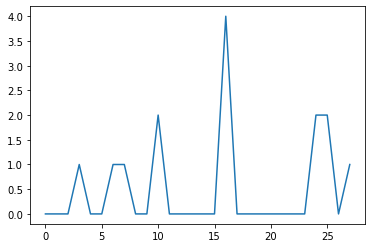

In [677]:
plt.plot(data.Sales[:28])

In [678]:
from statsmodels.graphics.tsaplots import plot_acf

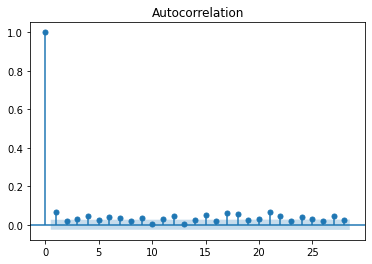

In [679]:
plot_acf(data.Sales, lags=28)
plt.show()

## Node Control

In [680]:
concated_df.Node.value_counts()

108    2061
104     441
129     268
74      261
105     234
       ... 
169       7
196       7
13        7
141       7
12        7
Name: Node, Length: 106, dtype: int64

In [681]:
concated_df[concated_df["Node"]==43].head()

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,trend,Node,Sales,new_feature
34,1,1,1,2.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,11,43,1,nan
118,1,1,1,2.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,0.00000000,39,43,2,1.00000000
202,1,1,1,2.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,67,43,1,2.00000000
223,0,1,0,2.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,74,43,3,1.00000000
307,0,1,1,2.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,102,43,4,3.00000000


In [682]:
concated_df[concated_df["Node"]==9].head()

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,trend,Node,Sales,new_feature
24,1,1,1,2.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,1.00000000,0.00000000,0.00000000,8,9,2,nan
26,1,1,1,2.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,8,9,0,2.00000000
27,1,1,0,2.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,9,9,1,0.00000000
29,1,1,0,2.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,9,9,0,1.00000000
33,1,1,1,2.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,11,9,0,0.00000000


In [683]:
concated_df[concated_df["Node"]==42].head()

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,trend,Node,Sales,new_feature
13,1,0,1,2.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,4,42,0,nan
55,0,0,0,2.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,18,42,0,0.00000000
76,0,0,0,2.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,25,42,3,0.00000000
97,1,0,1,2.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,32,42,2,3.00000000
139,0,0,0,2.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,0.00000000,46,42,0,2.00000000


In [684]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,84,0.30952381,0.63958176,-0.40497838,-inf,inf,0.07148455,0.54569391,1.76301110
1,Support Vector Regressor Linear Performance,84,0.30952381,0.63958176,3.91379054,inf,inf,0.15008115,1.21141136,3.91379054
2,Support Vector Regressor Polynomial Performance,84,0.30952381,0.63958176,0.35481302,-inf,inf,0.07039513,0.41413254,1.33796667
3,Random Forest Performance,84,0.30952381,0.63958176,-1.26569231,-inf,inf,0.09381269,0.69090476,2.23215385
4,Elastic Net Performance with Feature Extraction,84,0.30952381,0.63958176,-0.49274830,-inf,inf,0.07286724,0.56407503,1.82239625
5,SVR Linear Performance with Feature Extraction,84,0.30952381,0.63958176,-2.06299779,-inf,inf,0.09870242,0.80668808,2.60622302
6,SVR Polynomail Performance with Feature Extrac...,84,0.30952381,0.63958176,0.35359568,-inf,inf,0.07038870,0.41433207,1.33861129
7,Random Forest Performance with Feature Extraction,84,0.30952381,0.63958176,-1.44179487,-inf,inf,0.09883535,0.72246032,2.33410256


# General Function

In [685]:
# def result_obtain(df, feature_set, name, lag):

#     df[name]=feature_set
    
#     train=df[df["date"]<((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
#     test=df[df["date"]>=((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
#     test.reset_index(drop=True, inplace=True)

#     ### Date and Customer Drop

#     train=train.drop(["date"], axis=1)
#     test=test.drop(["date"], axis=1)

#     X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
#     X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
#     train.dropna(inplace=True);
#     train.reset_index(drop=True, inplace=True)
#     train.index += lag

#     X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
#     X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
    
    
#     # Linear Regression-Elastic Net

#     elastic_net_function = ElasticNet()

#     param_grid_elastic=[
#         {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
#     ]

#     elastic_net_function = GridSearchCV(estimator=elastic_net_function, param_grid=param_grid_elastic,
#                      cv=10,return_train_score=True)
    
#     elastic_net_function.fit(X_train, y_train)
    

#     elastic_predictions=elastic_net_function.predict(X_test)

#     res_elastic=performance_list(["Elastic Net Performance Lag " + str(lag)], elastic_predictions, y_test)

    
    
#     # Support Vector Machines

#     ### Linear

#     sv_regressor=LinearSVR()
    

#     ### Grid

#     param_grid_svm_linear=[
#         {"epsilon":[0.5,1,1.5]}
#     ]

#     sv_regressor_function = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
#                      cv=10,return_train_score=True)

#     sv_regressor_function.fit(X_train, y_train)


    
#     sv_regressor_poly=SVR(kernel="poly")
        
#     ### Grid

#     param_grid_svm_poly=[
#         {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
#     ]


#     sv_regressor_poly_function = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
#                      cv=10,return_train_score=True)

#     sv_regressor_poly_function.fit(X_train, y_train)


#     ### Predictions

#     svm_predictions_linear=sv_regressor_function.predict(X_test)
    
#     svm_predictions_poly=sv_regressor_poly_function.predict(X_test)


#     ### Results    

#     res_svr_poly=performance_list(["SVR Polynomial Performance Lag " + str(lag)], svm_predictions_poly, y_test)

#     res_svr_linear=performance_list(["SVR Linear Performance Lag " + str(lag)], svm_predictions_linear, y_test)

    
    
    
#     # Random Forest
    
#     ### Grid

#     param_grid=[
#         {"n_estimators":[200,300,500], "max_features":[8,12,16],
#          "bootstrap":[False,True]}
#     ]

#     random_reg_function=RandomForestRegressor()
#     grid_search = GridSearchCV(estimator=random_reg_function, param_grid=param_grid,
#                      cv=10,return_train_score=True)

#     ### Predictions

#     grid_search.fit(X_train, y_train)

#     ### Results

#     rf_predictions=grid_search.predict(X_test)

#     res_rf=performance_list(["Random Forest Performance Lag " + str(lag)], rf_predictions, y_test)
    
#     res_df=[res_elastic, res_svr_linear, res_svr_poly, res_rf]

#     total_res=pd.concat(res_df)
    
#     return total_res

In [686]:
# res1=result_obtain(data.copy(), data["Sales"].shift(+1), "lag1", 1)

In [687]:
# res1

In [688]:
# total_result